In [10]:
import numpy as np 
import json as json
import glob as glob
import zipfile as zipfile
import json as json
from nltk.tokenize import word_tokenize
import pandas as pd 
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import textblob
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MICE
import patsy
import pygal as pygal

In [11]:
pd.set_option('display.max_colwidth', -1)

pd.set_option('display.max_rows', 1000)

In [12]:
category = pd.read_csv('categories_titles.csv',error_bad_lines=False)
clean_votes = pd.read_csv('clean_votes.csv',error_bad_lines=False)

year = pd.read_csv('year.csv',error_bad_lines=False)
# country_code=pd.read_csv('country_codes_final.csv',error_bad_lines=False)

In [13]:
data=pd.merge(category, clean_votes, on=['resolut']);
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543566 entries, 0 to 543565
Data columns (total 8 columns):
resolut     543566 non-null object
descr       543566 non-null object
vote        543566 non-null object
descr1      543566 non-null object
category    543566 non-null object
voted       543566 non-null object
country     543566 non-null object
date        543566 non-null object
dtypes: object(8)
memory usage: 37.3+ MB


In [14]:
data['year'] = data['date'].apply(lambda x: int(x[-5:]))

In [15]:
# data1=data[data['category']!='Other']

In [16]:
# data1['resolut']

In [17]:
# data1['resolut2']=data1['resolut'].apply(lambda x: np.nan_to_num(x))

In [22]:
df1 = df.groupby(['year']).resolut.nunique().to_frame('count')
df1.reset_index(inplace=True)

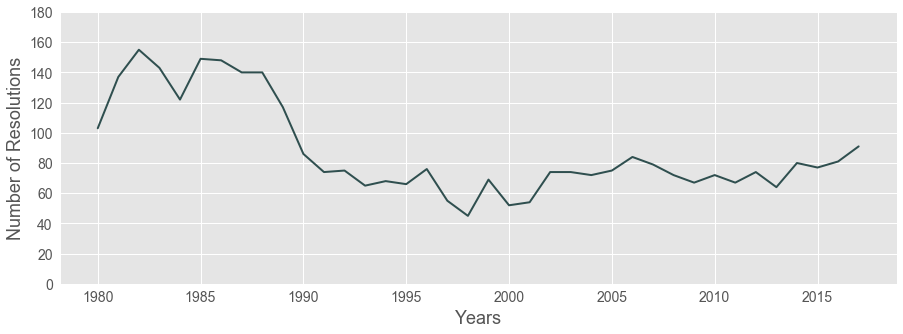

In [43]:
sns.set(font_scale=1.4)
plt.style.use('ggplot')
fig, axes=plt.subplots(figsize=(15,5))
plt.style.use('ggplot')
plt.plot(df1['year'], df1['count'], color='darkslategrey', linewidth=2)
plt.xlabel('Years',size=18)
plt.ylabel('Number of Resolutions', size=18)

# plt.title('Total Number of Resolutions 1980-2017')
plt.yticks(range(0,200, 20))

plt.show()

In [97]:
df=data[['category','year','resolut']]

df['category'].nunique()

63

In [98]:
df1 = df.groupby(['category','year']).resolut.nunique().to_frame('count')

df1.reset_index(inplace=True)
df2=df1.sort_values('count', ascending=False)

df2.reset_index(drop=True);

# df2.head(100)

In [99]:
df_nd=df2[df2['category']=='Nuclear Disarmament']
df_nuc_dis=pd.merge(year,df_nd , how='left', on='year', left_on=None, right_on=None)
df_nuc_dis=df_nuc_dis.apply(lambda x: np.nan_to_num(x))

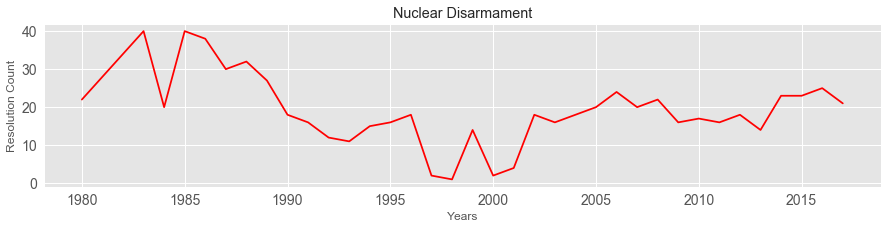

In [100]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_nuc_dis['year'], df_nuc_dis['count'], color='red')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Nuclear Disarmament')
plt.show()

In [101]:
df_dec=df2[df2['category']=='Decolonization']
df_decol=pd.merge(year,df_dec , how='left', on='year', left_on=None, right_on=None)
df_decol=df_decol.apply(lambda x: np.nan_to_num(x))

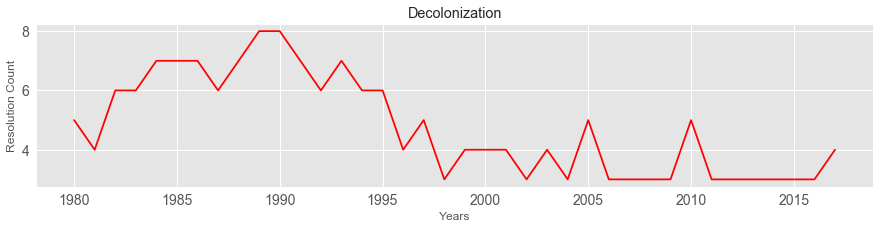

In [102]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_decol['year'], df_decol['count'], color='red')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Decolonization')
plt.show()

In [140]:


df_rd=df2[df2['category']=='Racial Discrimination']
df_rac_disc=pd.merge(year,df_rd, how='left', on='year', left_on=None, right_on=None)
df_rac_disc=df_rac_disc.apply(lambda x: np.nan_to_num(x))

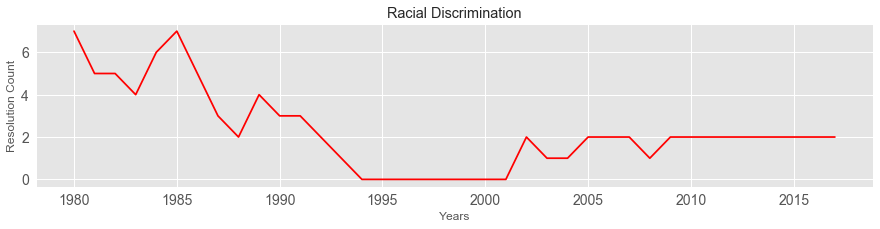

In [141]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_rac_disc['year'], df_rac_disc['count'], color='red')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Racial Discrimination')
plt.show()

In [105]:
df_sa=df2[df2['category']=='South Africa']
df_south_afr=pd.merge(year,df_sa , how='left', on='year', left_on=None, right_on=None)
df_south_afr=df_south_afr.apply(lambda x: np.nan_to_num(x))

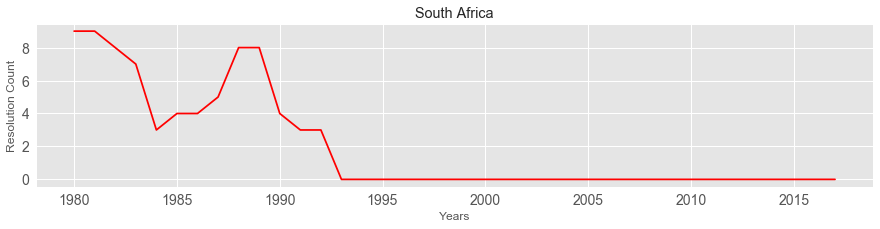

In [106]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_south_afr['year'], df_south_afr['count'], color='red')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('South Africa')
plt.show()

In [107]:
df_fu=df2[df2['category']=='Funding']
df_fund=pd.merge(year,df_fu , how='left', on='year', left_on=None, right_on=None)
df_fund=df_fund.apply(lambda x: np.nan_to_num(x))

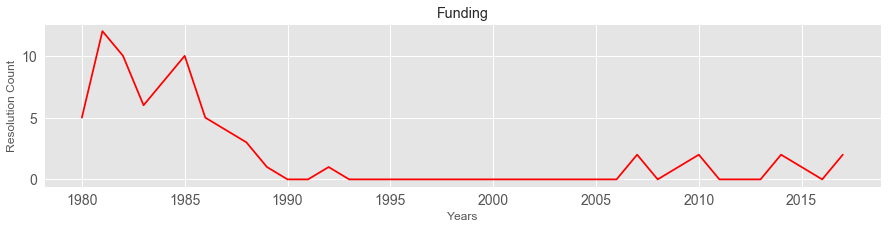

In [108]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_fund['year'], df_fund['count'], color='red')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Funding')
plt.show()

In [109]:
df_me=df2[df2['category']=='Middle East']
df_east=pd.merge(year,df_me , how='left', on='year', left_on=None, right_on=None)
df_east=df_east.apply(lambda x: np.nan_to_num(x))

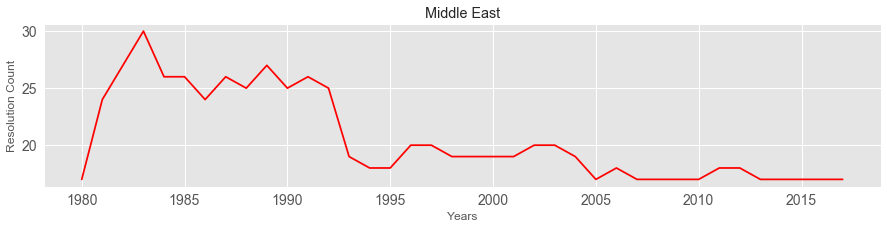

In [110]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_east['year'], df_east['count'], color='red')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Middle East')
plt.show()

In [111]:
df_sc=df2[df2['category']=='Security']
df_sec=pd.merge(year,df_sc , how='left', on='year', left_on=None, right_on=None)
df_sec=df_sec.apply(lambda x: np.nan_to_num(x))

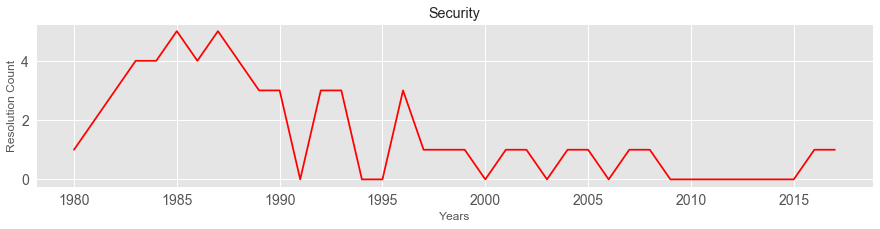

In [112]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_sec['year'], df_sec['count'], color='red')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Security')
plt.show()

In [113]:
df_ls=df2[df2['category']=='Law of the sea']
df_sea=pd.merge(year,df_ls , how='left', on='year', left_on=None, right_on=None)
df_sea=df_sea.apply(lambda x: np.nan_to_num(x))

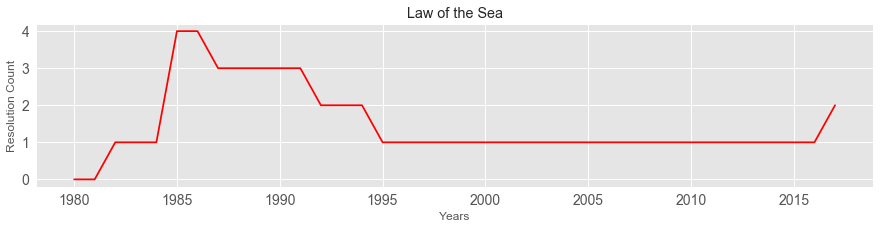

In [114]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_sea['year'], df_sea['count'], color='red')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Law of the Sea')
plt.show()

In [115]:
df_st=df2[df2['category']=='Science and Technology']
df_tech=pd.merge(year,df_st , how='left', on='year', left_on=None, right_on=None)
df_tech=df_tech.apply(lambda x: np.nan_to_num(x))

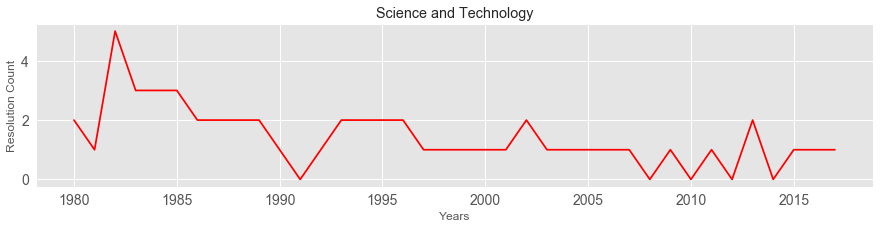

In [116]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_tech['year'], df_tech['count'], color='red')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Science and Technology')
plt.show()

In [117]:
df_arm=df2[df2['category']=='Arm Race in Space']
df_arm_race=pd.merge(year,df_arm , how='left', on='year', left_on=None, right_on=None)
df_arm_race=df_arm_race.apply(lambda x: np.nan_to_num(x))

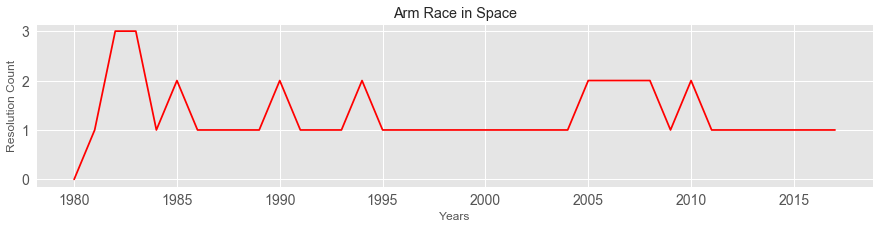

In [118]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_arm_race['year'], df_arm_race['count'], color='red')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Arm Race in Space')
plt.show()

In [119]:
df_nam=df2[df2['category']=='Namibia']
df_namibia=pd.merge(year,df_nam , how='left', on='year', left_on=None, right_on=None)
df_namibia=df_namibia.apply(lambda x: np.nan_to_num(x))

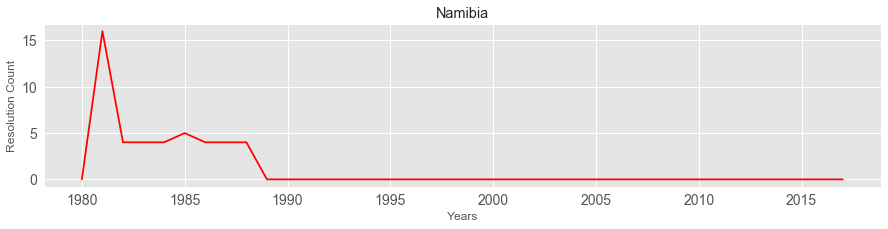

In [120]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_namibia['year'], df_namibia['count'], color='red')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Namibia')
plt.show()

In [121]:
df_p=df2[df2['category']=='Peace']
df_peace=pd.merge(year,df_p , how='left', on='year', left_on=None, right_on=None)
df_peace=df_peace.apply(lambda x: np.nan_to_num(x))

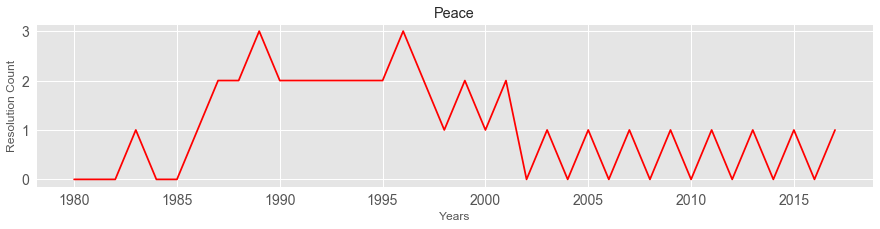

In [122]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_peace['year'], df_peace['count'], color='red')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Peace')
plt.show()

In [123]:
df_de=df2[df2['category']=='Developing Countries']
df_dev=pd.merge(year,df_de, how='left', on='year', left_on=None, right_on=None)
df_dev=df_dev.apply(lambda x: np.nan_to_num(x))

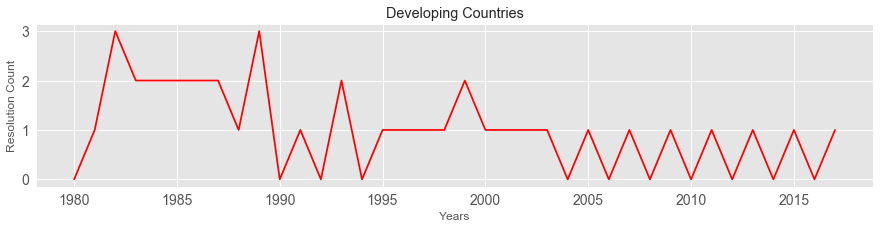

In [124]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_dev['year'], df_dev['count'], color='red')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Developing Countries')
plt.show()

In [125]:
df_l=df2[df2['category']=='Lebanon']
df_leb=pd.merge(year,df_l, how='left', on='year', left_on=None, right_on=None)
df_leb=df_leb.apply(lambda x: np.nan_to_num(x))

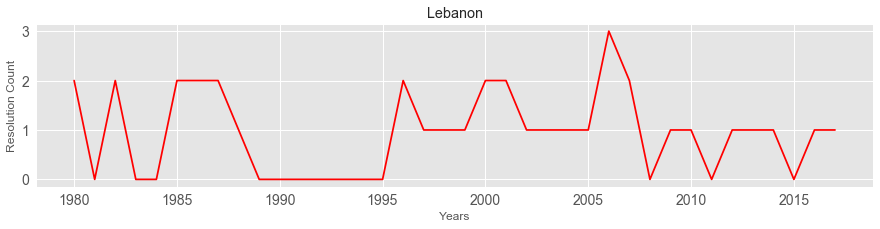

In [126]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_leb['year'], df_leb['count'], color='red')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Lebanon')
plt.show()

In [127]:
df_c=df2[df2['category']=='Cuba']
df_cuba=pd.merge(year,df_c, how='left', on='year', left_on=None, right_on=None)
df_cuba=df_cuba.apply(lambda x: np.nan_to_num(x))

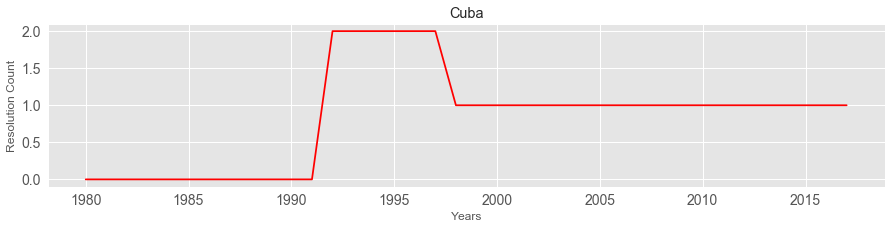

In [128]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_cuba['year'], df_cuba['count'], color='red')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Cuba')
plt.show()

In [129]:
df_env=df2[df2['category']=='Environment']
df_envr=pd.merge(year,df_env, how='left', on='year', left_on=None, right_on=None)
df_envr=df_envr.apply(lambda x: np.nan_to_num(x))

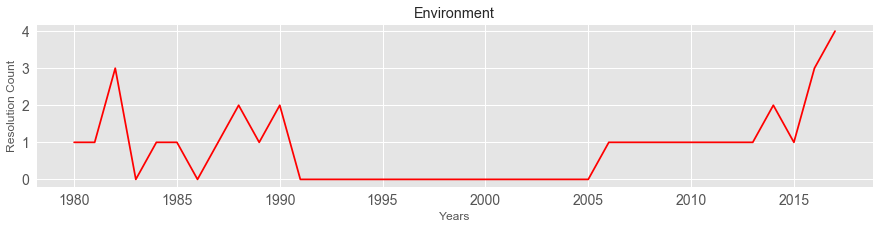

In [130]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_envr['year'], df_envr['count'], color='red')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Environment')
plt.show()

In [131]:
df_ir=df2[df2['category']=='Iran']
df_iran=pd.merge(year,df_ir, how='left', on='year', left_on=None, right_on=None)
df_iran=df_iran.apply(lambda x: np.nan_to_num(x))

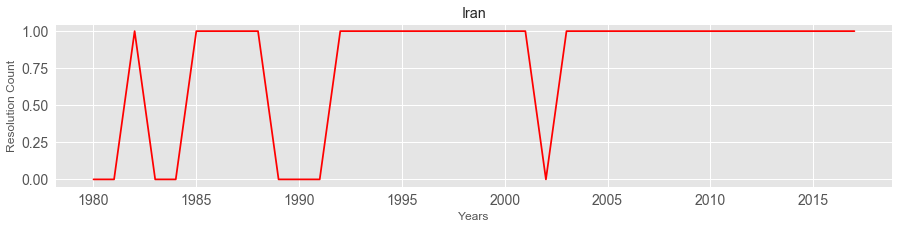

In [132]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_iran['year'], df_iran['count'], color='red')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Iran')
plt.show()

In [133]:
df_tk=df2[df2['category']=='Trade and Commodities']
df_trade=pd.merge(year,df_tk, how='left', on='year', left_on=None, right_on=None)
df_trade=df_trade.apply(lambda x: np.nan_to_num(x))

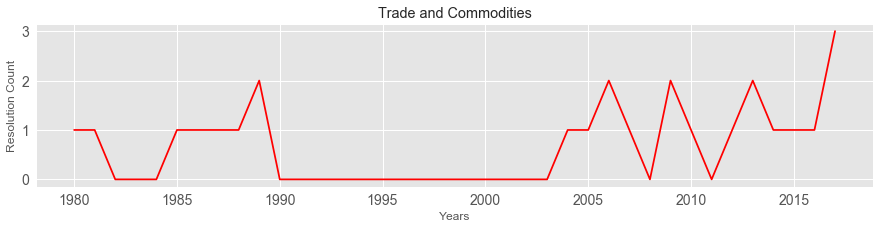

In [134]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_trade['year'], df_trade['count'], color='red')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Trade and Commodities')
plt.show()

In [135]:
df_c=df2[df2['category']=='Cooperation']
df_coop=pd.merge(year,df_c, how='left', on='year', left_on=None, right_on=None)
df_coop=df_coop.apply(lambda x: np.nan_to_num(x))

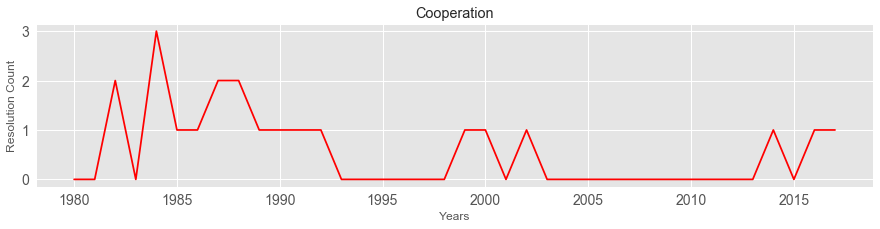

In [136]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_coop['year'], df_coop['count'], color='red')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Cooperation')
plt.show()

In [137]:
df_y=df2[df2['category']=='Yugoslavia']
df_yug=pd.merge(year,df_y , how='left', on='year', left_on=None, right_on=None)
df_yug=df_yug.apply(lambda x: np.nan_to_num(x))

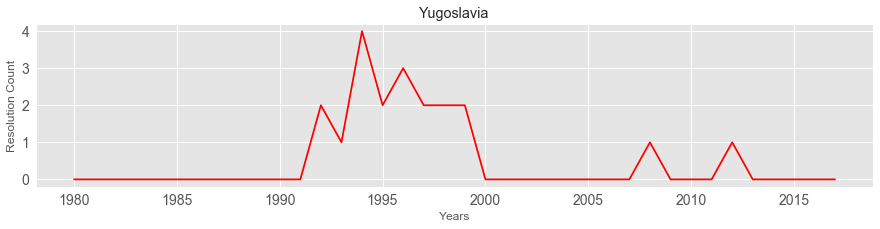

In [138]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_yug['year'], df_yug['count'], color='red')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Yugoslavia')
plt.show()

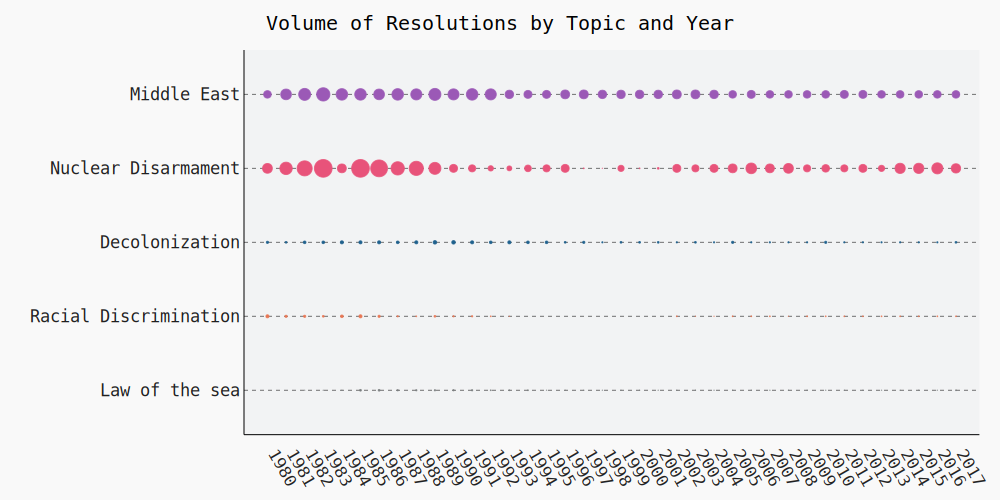

In [146]:
import pygal as pygal
# import cairosvg
from pygal.style import CleanStyle
from pygal.style import Style

custom_style = Style(title_font_size=20,label_font_size=17,\
                     value_label_font_size=13,plot_background ='#F2F3F4',\
                    colors=('#9B59B6', '#E8537A', '#1F618D', '#E87653', '#797D7F'))


dot_chart = pygal.Dot(x_label_rotation=60,show_legend=False,explicit_size=100,width=1000,height=500,style=custom_style)
dot_chart.title = 'Volume of Resolutions by Topic and Year'
dot_chart.x_labels = df_arm_race['year'].tolist()

dot_chart.add('Middle East', df_east['count'].tolist())
dot_chart.add('Nuclear Disarmament', df_nuc_dis['count'].tolist())
dot_chart.add('Decolonization', df_decol['count'].tolist())
dot_chart.add('Racial Discrimination', df_rac_disc['count'].tolist())

dot_chart.add('Law of the sea', df_sea['count'].tolist())




# dot_chart.add('Science and Technology', df_tech['count'].tolist())

# dot_chart.add('Arm Race in Space', df_arm_race['count'].tolist())
# dot_chart.add('Namibia', df_namibia['count'].tolist())
# dot_chart.add('Peace', df_peace['count'].tolist())




# dot_chart.add('Developing Countries', df_dev['count'].tolist())
# dot_chart.add('Lebanon', df_leb['count'].tolist())
# dot_chart.add('Cuba', df_cuba['count'].tolist())
# dot_chart.add('Environment', df_envr['count'].tolist())
# dot_chart.add('Iran', df_iran['count'].tolist())
# dot_chart.add('Status of Jerusalem', df_jer['count'].tolist())

# dot_chart.add('Trade and Commodities', df_trade['count'].tolist())
# dot_chart.add('Sovereignty of Palestine', df_pal['count'].tolist())
# dot_chart.add('Cooperation', df_coop['count'].tolist())
# dot_chart.add('Yugoslavia', df_yug['count'].tolist())









# dot_chart.render()


# display({'image/svg': dot_chart.render()}, raw=True)

# dot_chart.render_to_png('/tmp/chart.png')

display({'image/svg+xml': dot_chart.render()}, raw=True)

# dot_chart.render_to_png('my_chart.png')

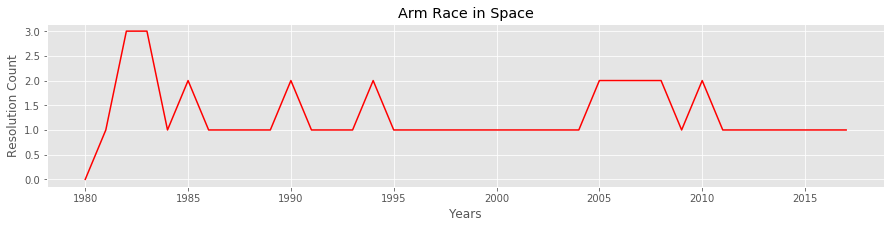

In [236]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_arm_race['year'], df_arm_race['count'], color='red')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Arm Race in Space')
plt.show()

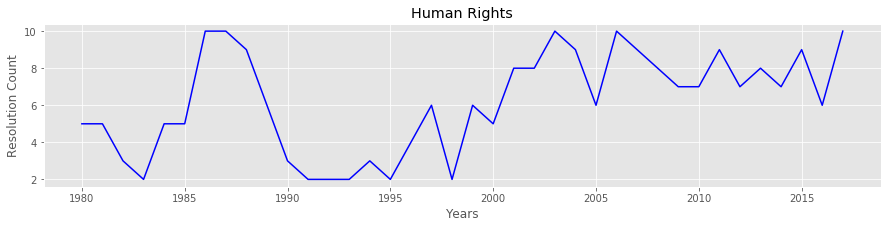

In [237]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_hum_rights['year'], df_hum_rights['count'], color='blue')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Human Rights')
plt.show()

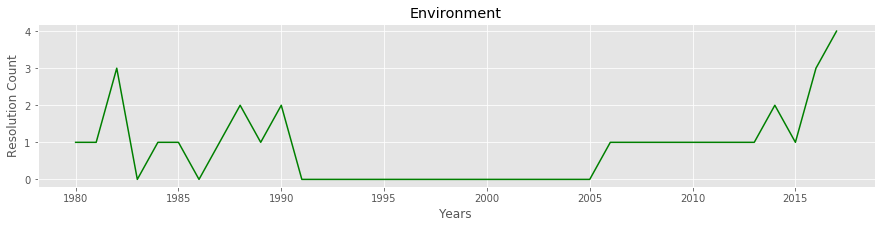

In [238]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_envr['year'], df_envr['count'], color='green')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Environment')
plt.show()

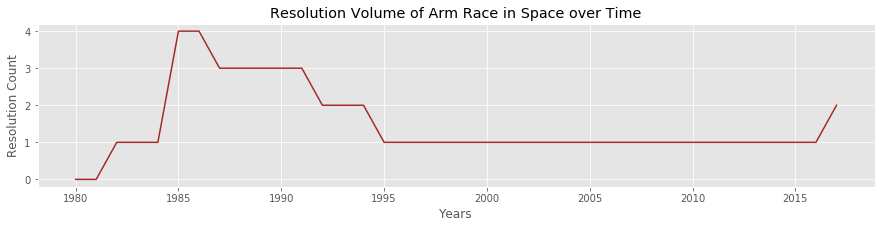

In [239]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_sea_law['year'], df_sea_law['count'], color='brown')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Resolution Volume of Arm Race in Space over Time')
plt.show()

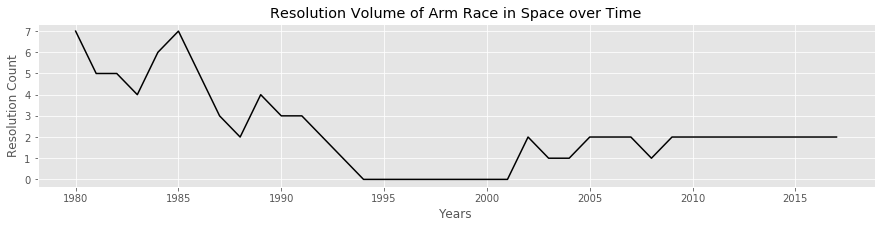

In [240]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_disc_race['year'], df_disc_race['count'], color='k')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Resolution Volume of Arm Race in Space over Time')
plt.show()

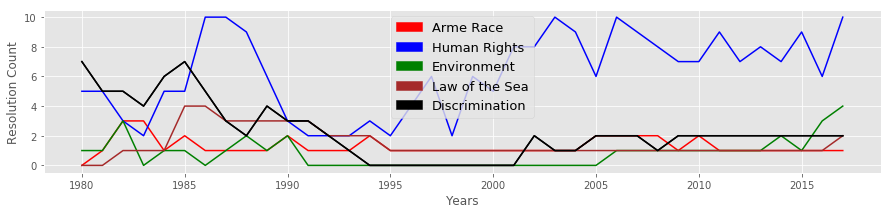

In [258]:
import matplotlib.patches as mpatches

fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')



plt.plot(df_arm_race['year'], df_arm_race['count'], color='red')
plt.plot(df_hum_rights['year'], df_hum_rights['count'], color='blue')
plt.plot(df_envr['year'], df_envr['count'], color='green')
plt.plot(df_sea_law['year'], df_sea_law['count'], color='brown')
plt.plot(df_disc_race['year'], df_disc_race['count'], color='k')


plt.plot(df_disc_race['year'], df_disc_race['count'], color='k')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
# plt.title('Resolution Volume of Arm Race in Space over Time')

arm_race_patch = mpatches.Patch(color='red', label='Arme Race')
hum_rights_patch = mpatches.Patch(color='blue', label='Human Rights')
envr_patch = mpatches.Patch(color='green', label='Environment')
sea_law_patch = mpatches.Patch(color='brown', label='Law of the Sea')
disc_race_patch = mpatches.Patch(color='k', label='Discrimination')
plt.legend(handles=[arm_race_patch, hum_rights_patch,envr_patch,sea_law_patch,disc_race_patch],loc='best', fontsize = 13,markerscale=2)

# plt.xlim(min(np.arange(len(df_arm_race['year']))), max(np.arange(len(df_arm_race['year']))))

plt.show()